# Q1 
已知 A=0.6、B=1.2、C=100，試以 D 值可能出現的 1024 種可能性為 X 軸，Energy(A,B,C,D)為 Y 軸，繪製折線圖


In [11]:
#F2的函數
def F2(t,A,B,C,D):
    return A*(t**B)+C*np.cos(D*t)+np.random.normal(0,1,t.shape)
def F(t,A,B,C,D):
    return A*(t**B)+C*np.cos(D*t)

In [12]:
T=np.random.random((1000,1))*1000  #隨機生成T
b2=  F2(T,0.6,1.2,100,-0.4)  

In [13]:
A = 0.6
B = 1.2
C = 100
D = np.arange(-5.11,5.13,0.01)
Energy=[]
for d in D:
    Energy.append(np.mean(abs(b2-F(T,A,B,C,d))))

In [14]:
Energy

[78.85864780796108,
 80.65258866220744,
 80.8872265522742,
 82.84347761234962,
 82.25580217260516,
 82.6131007483707,
 82.21930268937265,
 81.93905068504266,
 79.98903993484444,
 81.96078553642987,
 78.92444098199158,
 79.88463500559635,
 80.43131311960424,
 80.47163725698894,
 79.60842255156696,
 84.09873724320984,
 79.33777304900015,
 85.49945535752045,
 79.21303013744901,
 80.81627209572541,
 78.56159556665402,
 81.37284188869735,
 82.35420156638814,
 80.6436529612423,
 79.80778819750408,
 79.55380244427249,
 82.26123505150146,
 79.69799855275193,
 80.15791673758068,
 78.54197785324702,
 81.76125879435739,
 82.85319754807124,
 80.51240756287226,
 82.01659666863115,
 81.58528965555563,
 77.50714626132138,
 79.45872225231159,
 81.81879171739926,
 80.82537500013962,
 80.26012871464228,
 81.93388062547294,
 79.95481384810721,
 81.1405742073191,
 79.88842546123628,
 79.82011732130296,
 79.59857260461632,
 81.33160454110195,
 81.94928770988551,
 81.70570561589686,
 83.25351226569349,
 80.

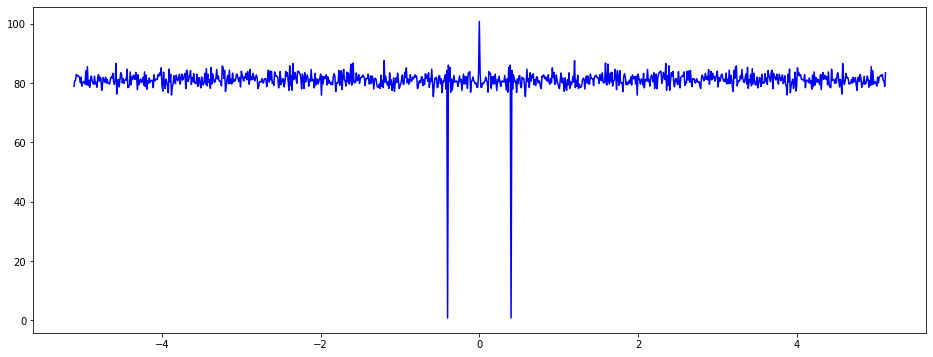

In [15]:
#繪製圖表
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16,6))
plt.plot(D,Energy,c = "b") 

# Q2
已知 B=1.2、D=0.4，試以 A、C 可能出現的值為 X、Y 軸，Energy(A,B,C,D)為 Z 軸，繪製 3D 
surface

In [41]:
#F2的函數
def F2(t,A,B,C,D):
    return A*(t**B)+C*np.cos(D*t)+np.random.normal(0,1,t.shape)
def F(t,A,B,C,D):
    return A*(t**B)+C*np.cos(D*t)

In [42]:
T=np.random.random((1000,1))*1000  #隨機生成T
b2=  F2(T,0.6,1.2,100,0.4)  

In [53]:
B = 1.2
D = 0.4
A = np.arange(-5.11,5.13,0.01)
C = np.arange(-511,513,1)
Energy2=np.zeros((1024,1024))
for a in range(len(A)):
    for c in range(len(C)):
        Energy2[a][c]=np.mean(abs(b2-F(T,A[a],B,C[c],D)))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
XX,YY = np.meshgrid(A, C)
ax=plt.axes(projection='3d')
ax.plot_surface(XX,YY,Energy2, cmap='seismic')
ax.view_init(-140, 60)
plt.show()

# Q3

In [1]:
def gene2coef(gene):
    Beta = (np.sum(2**np.arange(10)*gene[0:10]))/1024
    phi = (np.sum(2**np.arange(10)*gene[10:20]))*(2*np.pi)/1024
    omega = (np.sum(2**np.arange(10)*gene[20:30]))/100
    tc = (np.sum(2**np.arange(2)*gene[30:32]))+731
    return Beta,phi,omega,tc

In [5]:
def F1(t,A,B,C,Beta,phi,omega,tc):
    return A + B*(tc-t)**Beta + B*(tc-t)**Beta*C*np.cos(omega*np.log(tc-t)+phi)
    

In [9]:
import numpy as np
pop = np.random.randint(0,2,(N,32))
#原始人 N*32個亂數產的0/1
fit = np.zeros((N,1))

In [10]:
import pandas as pd
NVDA=pd.read_csv("NVDA.csv")

In [16]:
close.to_numpy

<bound method IndexOpsMixin.to_numpy of 0       34.055000
1       31.997499
2       34.047501
3       35.849998
4       34.957500
          ...    
962    128.960007
963    131.759995
964    138.339996
965    134.970001
966    135.429993
Name: Close, Length: 967, dtype: float64>

In [17]:
close=np.log(close)

In [18]:
close=close[:734]

In [19]:
close

0      3.527977
1      3.465658
2      3.527757
3      3.579344
4      3.554133
         ...   
729    5.766945
730    5.760352
731    5.789165
732    5.752668
733    5.810422
Name: Close, Length: 734, dtype: float64

In [20]:
N=10000
G=30
survive_rate = 0.05 #只有5%活下
mutation_rate = 0.001 #突變率 (大:增加嘗試 小:穩定 爸媽好小孩普遍好)
survive= round(N*survive_rate)
mutation = round(N*32*mutation_rate) #每人有32基因
T=np.arange(0,734)

In [ ]:
for generation in range(G):
    print(generation)
    #先算這10000人有多適合活在這個世界上 越小越好!!
    for i in range(N):
        Beta,phi,omega,tc=gene2coef(pop[i,:])
        
        m=np.zeros((tc,3))
        b=np.zeros((tc,1))
        for t in range(0,tc):
            b[t] = close[t]
            m[t,0] = 1
            m[t,1] = (tc-t)**Beta
            m[t,2] = (tc-t)**Beta*np.cos(omega*np.log(tc-t)+phi)
            x=np.linalg.lstsq(m,b)[0]
            A=x[0]
            B=x[1]
            C=x[2]/x[1]
            fit[i]=np.mean(abs(F1(t,A,B,C,Beta,phi,omega,tc)-close[t]))
    #殺人
    sort_fit=np.argsort(fit[:,0]) #排序 小的在前
                        #取index
    pop=pop[sort_fit,:]
    for i in range(survive,N):
        dad_id=np.random.randint(0,survive)
        mom_id=np.random.randint(0,survive)
        #父母不可以自體繁殖
        while(dad_id==mom_id):
            mom_id=np.random.randint(0,survive)
        #基因砟傳
        mask = np.random.randint(0,2,[1,40])
        son = pop[mom_id,:].copy()
        dad = pop[dad_id,:]
        son[mask[0,:]==1] = dad[mask[0,:]==1]
        pop[i,:]=son
    #突變
    for i in range(mutation):
        #挑人
        m=np.random.randint(survive,N)
        #挑基因
        n=np.random.randint(0,40)
        #基因突變 0>1  1>0
        pop[m,n]=1-pop[m,n]
for i in range(N):
        A,B,C,D=gene2coef(pop[i,:])
        fit[i]=np.mean(abs(F2(T,A,B,C,D)-b2))
sort_fit=np.argsort(fit[:,0])
pop=pop[sort_fit,:]
#最最最近的答案
A,B,C,D=gene2coef(pop[0,:])